## Setup

In [2]:
#!pip install tensorflow-datasets

In [3]:

from sklearn.model_selection import train_test_split
import numpy as np
#import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import copy
from scipy.stats import entropy
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
# import tensorflow_datasets as tfds
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

# Clean Data

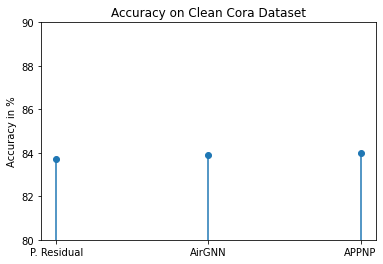

In [4]:
baseAccCora = [83.7, 83.9, 84.0] #ours, airgnn, appnp
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2]
plt.stem(baseAccCora);
plt.title("Accuracy on Clean Cora Dataset");
plt.ylim(80.0, 90.0);
plt.xticks(x,models);
plt.ylabel("Accuracy in %");

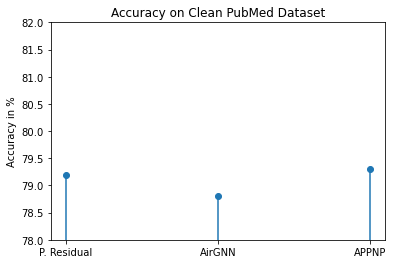

In [5]:
baseAccCora = [79.2, 78.8, 79.3] #ours, airgnn, appnp
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2]
plt.stem(baseAccCora);
plt.title("Accuracy on Clean PubMed Dataset");
plt.ylim(78.0, 82.0);
plt.xticks(x,models);
plt.ylabel("Accuracy in %");

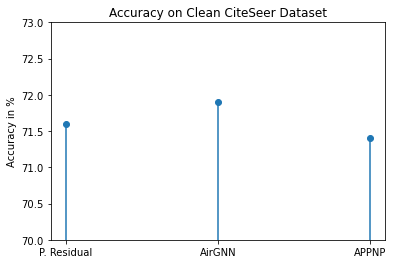

In [6]:
baseAccCora = [71.6, 71.9, 71.4] #ours, airgnn, appnp
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2]
plt.stem(baseAccCora);
plt.title("Accuracy on Clean CiteSeer Dataset");
plt.ylim(70.0, 73);
plt.xticks(x,models);
plt.ylabel("Accuracy in %");

# On Noisy Data

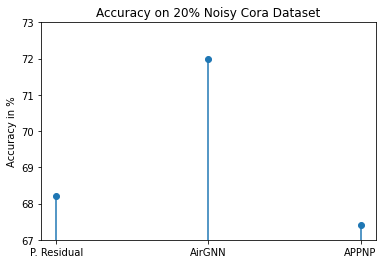

In [10]:
baseAccCora = [68.2, 72.0, 67.4] #ours, airgnn, appnp
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2]
plt.stem(baseAccCora);
plt.title("Accuracy on 20% Noisy Cora Dataset");
plt.ylim(67.0, 73);
plt.xticks(x,models);
plt.ylabel("Accuracy in %");

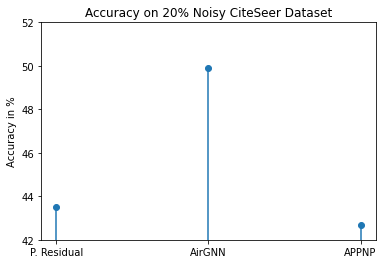

In [12]:
baseAccCora = [43.5, 49.9, 42.7] #ours, airgnn, appnp
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2]
plt.stem(baseAccCora);
plt.title("Accuracy on 20% Noisy CiteSeer Dataset");
plt.ylim(42.0, 52);
plt.xticks(x,models);
plt.ylabel("Accuracy in %");

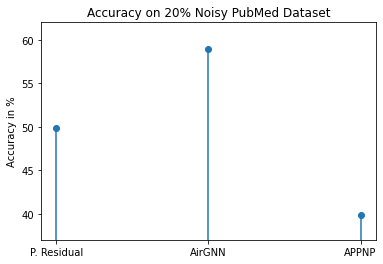

In [16]:
baseAccCora = [49.8, 58.9, 39.8] #ours, airgnn, appnp
models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2]
plt.stem(baseAccCora);
plt.title("Accuracy on 20% Noisy PubMed Dataset");
plt.ylim(37, 62);
plt.xticks(x,models);
plt.ylabel("Accuracy in %");

# Adversarial Plots

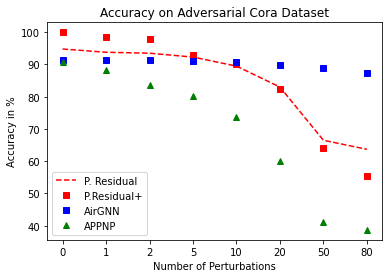

In [77]:
###Cora

pres = [94.8,93.8,93.5,92.3,89.5,83.0,66.5,63.7] 
presPRO = 100*np.array([1.000, 0.985, 0.980, 0.930, 0.900, 0.825, 0.642, 0.555])
airG = 100*np.array([0.913, 0.913, 0.913, 0.910, 0.907, 0.897, 0.890, 0.875])
app = 100*np.array([0.908, 0.882 , 0.837,0.802,0.738, 0.600, 0.412,0.387])
models = ['P. Residual', 'P.Residual+', 'AirGNN', 'APPNP']
x = [0, 1, 2, 5, 10, 20, 50, 80]
r = [0,1,2,3,4,5,6,7]
plt.plot(r, pres, 'r--');
plt.plot(r,presPRO, 'rs');
plt.plot(r, airG, 'bs');
plt.plot(r, app, 'g^')
plt.legend(models)
#plt.ylim(70.0, 73);
plt.xticks(r,x);
plt.xlabel("Number of Perturbations")
plt.ylabel("Accuracy in %")
plt.title("Accuracy on Adversarial Cora Dataset");

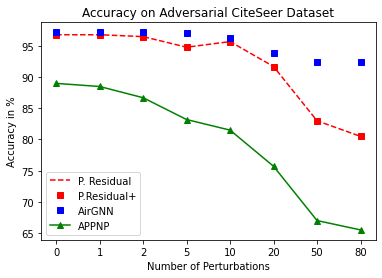

In [79]:
#cite seer

pres = [96.8,96.8,96.5,94.8,95.7,91.7,83.0,80.5] 
presPRO = 100*np.array([0.968, 0.968, 0.965, 0.948, 0.957, 0.917, 0.830, 0.805 ])
airG = 100*np.array([0.972,  0.972, 0.972, 0.970, 0.962 , 0.938 , 0.925, 0.925 ])
app = 100*np.array([0.890 ,0.885, 0.867 , 0.832, 0.815, 0.757, 0.670, 0.655])
models = ['P. Residual', 'P.Residual+', 'AirGNN', 'APPNP']
x = [0, 1, 2, 5, 10, 20, 50, 80]
r = [0,1,2,3,4,5,6,7]
plt.plot(r, pres, 'r--');
plt.plot(r,presPRO, 'rs');
plt.plot(r, airG, 'bs');
plt.plot(r, app, 'g^-')
plt.legend(models)
#plt.ylim(70.0, 73);
plt.xticks(r,x);
plt.xlabel("Number of Perturbations")
plt.ylabel("Accuracy in %")
plt.title("Accuracy on Adversarial CiteSeer Dataset");

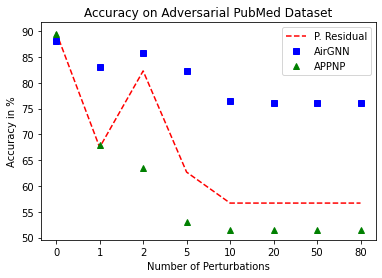

In [41]:
## pubmed

pres = [89.8, 67.5,82.3,62.7,56.7,56.7,56.7, 56.7] 
airG = 100*np.array([0.882, 0.830, 0.857, 0.823, 0.765, 0.760, 0.760, 0.760 ])
app = 100*np.array([0.895 , 0.680,0.635,0.530,0.515, 0.515,0.515, 0.515])

models = ['P. Residual', 'AirGNN', 'APPNP']
x = [0, 1, 2, 5, 10, 20, 50, 80]
r = [0,1,2,3,4,5,6,7]
plt.plot(r, pres, 'r--');
plt.plot(r, airG, 'bs');
plt.plot(r, app, 'g^')
plt.legend(models)
#plt.ylim(70.0, 73);
plt.xticks(r,x);
plt.xlabel("Number of Perturbations")
plt.ylabel("Accuracy in %")
plt.title("Accuracy on Adversarial PubMed Dataset");

In [74]:
n = np.ones((4,9))
print(n.shape[1])
f = np.random.rand(4,9)
n+f

9


array([[1.13255185, 1.24717585, 1.46468814, 1.16108171, 1.86069231,
        1.67475653, 1.3760079 , 1.41295198, 1.84404442],
       [1.34033237, 1.81481495, 1.31110282, 1.0723494 , 1.91704607,
        1.95097661, 1.51818495, 1.43625347, 1.58729382],
       [1.51068504, 1.74010969, 1.62088154, 1.71375501, 1.75251071,
        1.95762307, 1.66562689, 1.96665205, 1.33394317],
       [1.6482737 , 1.47587624, 1.88977499, 1.72542833, 1.125062  ,
        1.15040399, 1.19642401, 1.7327861 , 1.62686543]])

In [72]:
p = np.random.multivariate_normal(mean=np.zeros(n.shape[1]), cov = (1/n.shape[1])*np.eye(n.shape[1]))

In [75]:
np.random.uniform()

0.3390484917304578

In [73]:
p

array([-0.19115511,  0.25792453,  0.03340978,  0.00642258,  0.00411052,
        0.20983148, -0.06478725,  0.17682255,  0.1321411 ,  0.12156012,
        0.07221201, -0.08364332, -0.05544998,  0.08914492, -0.03309849,
       -0.03424178, -0.00030823, -0.03135864,  0.02084162, -0.11174055,
        0.05920847,  0.0126684 , -0.19057121,  0.0262317 ,  0.10155001,
        0.07012375,  0.19349731,  0.07542128, -0.04455862, -0.19833805,
        0.07101349,  0.10233512,  0.06744558, -0.06857787, -0.10055678,
        0.16609725,  0.06290124, -0.1219123 , -0.06196692, -0.02673092,
       -0.18125937,  0.15850021,  0.0012668 , -0.0934205 , -0.01038345,
        0.02741375, -0.01036667,  0.07305843, -0.25716669,  0.00755444,
       -0.05396395, -0.24531617, -0.00984967,  0.05498208,  0.22386579,
        0.02268984, -0.10153869,  0.08573777, -0.10399291,  0.14267351,
        0.07881194, -0.03828959, -0.23826199,  0.00163397,  0.0302671 ,
       -0.09074433,  0.12065255,  0.06525482, -0.09683742,  0.03